# Linear stretch

Your code will take as input a color image *im* (a torch.Tensor with dtype torch.uint8 and rank 3) and two scalars *a* and *b*. It must apply a pixel-wise linear transformation (every pixel p is transformed to a⋅p+b). The code should produce a new image out with the same shape and dtype.

*a* and *b* can be either ints or floats. Be careful to: compute the exact result, round to nearest integer and then clip between 0 and 255.


(50, 75, 3)
a: 1.3964213540847896 b: -29.209462298603462


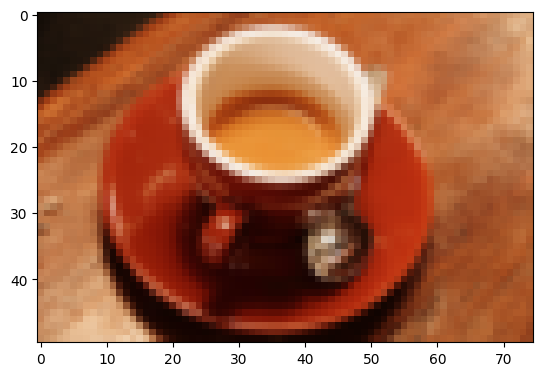

In [23]:
import random
import numpy as np
import torch
from skimage import data
from skimage.transform import resize
from matplotlib import pyplot as plt

im = data.coffee()
im = resize(im, (im.shape[0] // 8, im.shape[1] // 8), mode='reflect', preserve_range=True, anti_aliasing=True).astype(np.uint8)
print(im.shape)
plt.imshow(im)

im = np.swapaxes(np.swapaxes(im, 0, 2), 1, 2)
im = torch.from_numpy(im)

a = random.uniform(0,2)
b = random.uniform(-50,50)
print("a:", a, "b:",b)

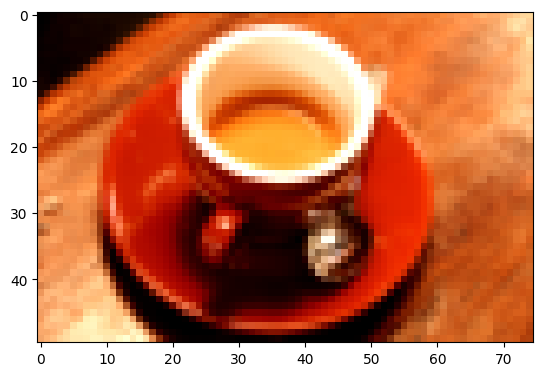

In [25]:
out = im.type(torch.float32)
out = out * a + b
out = torch.round(out)
out = out.clamp(0,255)
out = out.to(torch.uint8)

toShow = np.swapaxes(out, 0, 2)
toShow = np.swapaxes(toShow, 0, 1)

plt.imshow(toShow)